<h1> Logistic Regression </h1>

In [1]:
import pandas as pd
import numpy as np
import sklearn


rawdata = pd.read_csv('titanic.csv')
rawdata = rawdata.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'Pclass', 'Sex','Embarked'])
rawdata.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [2]:
y = np.array(rawdata['Survived'].values, order='F')
X = np.array(rawdata.drop(columns = ['Survived']).values)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)

# Predict for testing values
y_pred_probabilities = logreg.predict_proba(X)
y_predicted = logreg.predict(X)


# Evaluation metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_predicted))

from sklearn.metrics import classification_report
print(classification_report(y, y_predicted))

[[392  32]
 [193  97]]
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       424
           1       0.75      0.33      0.46       290

    accuracy                           0.68       714
   macro avg       0.71      0.63      0.62       714
weighted avg       0.70      0.68      0.65       714



/home/ngopi/anaconda3/envs/VAnalPrimer/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


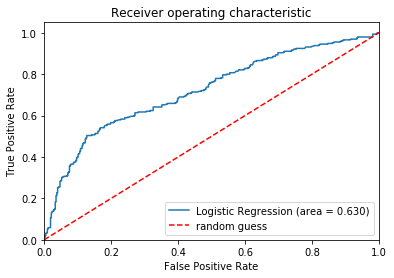

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y, y_predicted)
fpr, tpr, thresholds = roc_curve(y, y_pred_probabilities[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<h1>Decision Tree Classification</h1>

[[421   3]
 [ 14 276]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       424
           1       0.99      0.95      0.97       290

    accuracy                           0.98       714
   macro avg       0.98      0.97      0.98       714
weighted avg       0.98      0.98      0.98       714



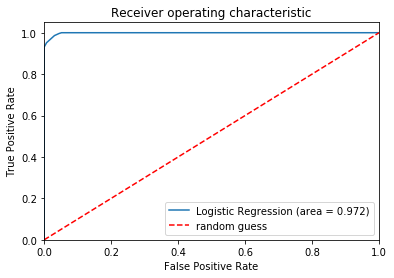

In [5]:
import pandas as pd
import numpy as np
import sklearn

rawdata = pd.read_csv('titanic.csv')
rawdata = rawdata.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'Pclass', 'Sex','Embarked'])

y = np.array(rawdata['Survived'].values, order='F')
X = np.array(rawdata.drop(columns = ['Survived']).values)

# Decision Tree
from sklearn import tree
from sklearn import metrics
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X, y)

# Predict for testing values
y_pred_probabilities = decision_tree.predict_proba(X)
y_predicted = decision_tree.predict(X)

# Evaluation metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_predicted))

from sklearn.metrics import classification_report
print(classification_report(y, y_predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y, y_predicted)
fpr, tpr, thresholds = roc_curve(y, y_pred_probabilities[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<h1>Support Vector Classification </h1>

[[398  26]
 [ 87 203]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       424
           1       0.89      0.70      0.78       290

    accuracy                           0.84       714
   macro avg       0.85      0.82      0.83       714
weighted avg       0.85      0.84      0.84       714



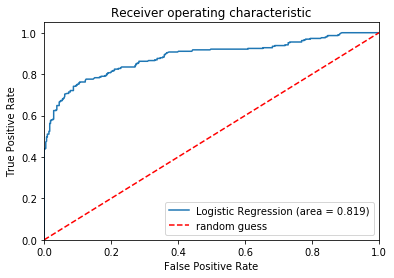

In [6]:
import pandas as pd
import numpy as np
import sklearn

rawdata = pd.read_csv('titanic.csv')
rawdata = rawdata.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'Pclass', 'Sex','Embarked'])

y = np.array(rawdata['Survived'].values, order='F')
X = np.array(rawdata.drop(columns = ['Survived']).values)

# Decision Tree
from sklearn.svm import SVC
from sklearn import metrics
svc_model = SVC(kernel='rbf', gamma=0.1, C=1.0, probability=True)
svc_model.fit(X, y)

# Predict for testing values
y_pred_probabilities = svc_model.predict_proba(X)
y_predicted = svc_model.predict(X)

# Evaluation metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_predicted))

from sklearn.metrics import classification_report
print(classification_report(y, y_predicted))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y, y_predicted)
fpr, tpr, thresholds = roc_curve(y, y_pred_probabilities[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<h1>Comparing models </h1>

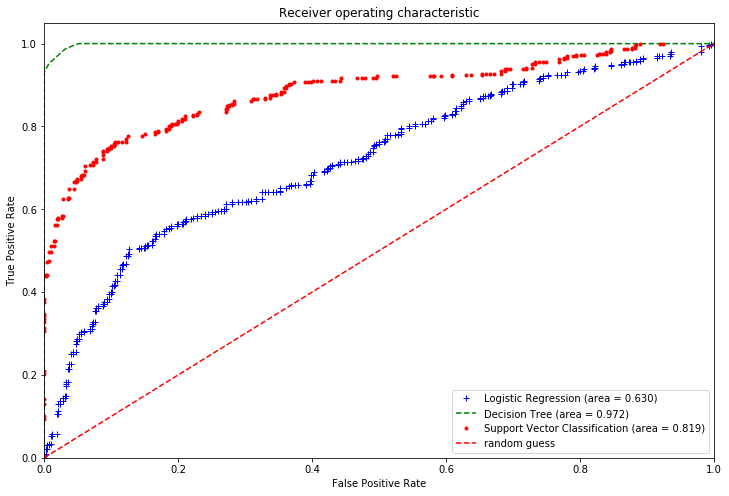

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
logit_roc_auc = roc_auc_score(y, logreg.predict(X))
dtree_roc_auc = roc_auc_score(y, decision_tree.predict(X))
svc_roc_auc = roc_auc_score(y, svc_model.predict(X))
fpr1, tpr1, thresholds1 = roc_curve(y, logreg.predict_proba(X)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y, decision_tree.predict_proba(X)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y, svc_model.predict_proba(X)[:,1])
plt.figure(figsize=(12, 8))
plt.plot(fpr1, tpr1, 'b+',label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot(fpr2, tpr2, 'g--', label='Decision Tree (area = %0.3f)' % dtree_roc_auc)
plt.plot(fpr3, tpr3, 'r.', label='Support Vector Classification (area = %0.3f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()